In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats 

In [6]:
x = [1000, 1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000, 3500]
y = [150, 180, 210, 240, 270, 300, 330, 360, 390, 450]

In [7]:
def LinearRegressionModelGraph(x, y):

    x = np.array(x)
    y = np.array(y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)


    B1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    B0 = y_mean - B1 * x_mean
    y_prediction = B0 + B1 * x
    return (
    plt.scatter(x, y, color='blue', label='Actual'),
    plt.plot(x, y_prediction, color='red', label='Fitted Line'),
    plt.xlabel('X'),
    plt.ylabel('Y'),
    plt.title('Simple Linear Regression'),
    plt.legend(),
    plt.show(),
    )

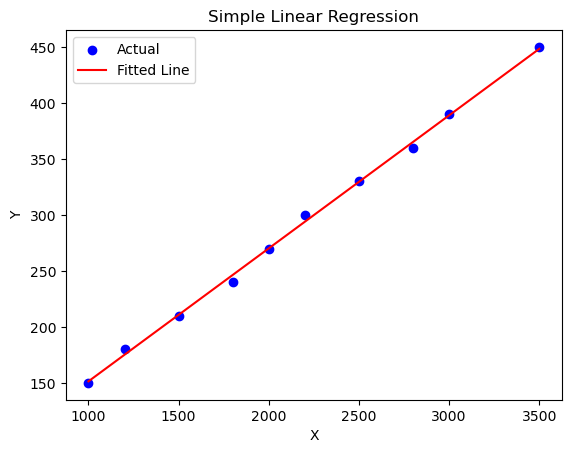

(<matplotlib.collections.PathCollection at 0x14f9f5940>,
 Text(0.5, 24.0, 'X'),
 Text(24.000000000000007, 0.5, 'Y'),
 Text(0.5, 1.0, 'Simple Linear Regression'),
 None)

In [8]:
LinearRegressionModelGraph(x, y)

In [9]:
def SimpleLinearRegression(x, y):
    x = np.array(x)
    y = np.array(y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    n = len(x)

    B1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    B0 = y_mean - B1 * x_mean
    y_pred = B0 + B1 * x

    sst = sum((y-y_mean)**2)
    ssr = sum((y_pred-y_mean)**2)
    sse = sum((y - y_pred)**2)
    r2 = ssr / sst
    s = ((sse)/(n-2))**0.5
    standard_error_b1 = s / np.sqrt(sum((x-x_mean)**2))
    standard_error_b0 = s * np.sqrt((1/n) + (x_mean**2)/np.sum((x - x_mean)**2))
    t_stats_b1 = (B1 - 0)/(standard_error_b1)
    t_stats_b0 = (B0 - 0)/(standard_error_b0)
    t_crit = stats.t.ppf(0.975, df=n-2)
    ci_b1 = (B1 - t_crit * standard_error_b1, B1 + t_crit * standard_error_b1)
    ci_b0 = (B0 - t_crit * standard_error_b0, B0 + t_crit * standard_error_b0)

    ci_b1 = (B1 - t_crit * standard_error_b1, B1 + t_crit * standard_error_b1)
    ci_b0 = (B0 - t_crit * standard_error_b0, B0 + t_crit * standard_error_b0)
    p_b1 = 2*(1 - stats.t.cdf(abs(t_stats_b1), df=n-2))
    p_b0 = 2*(1 - stats.t.cdf(abs(t_stats_b0), df=n-2))

    table = pd.DataFrame({
        "Term": ["Intercept", "Slope"],
        "Coefficient": [B0, B1],
        "Std Error": [standard_error_b0, standard_error_b1],
        "t-Statistic": [t_stats_b0, t_stats_b1],
        "P-Value": [p_b0, p_b1],
        "95% CI Lower": [ci_b0[0], ci_b1[0]],
        "95% CI Upper": [ci_b0[1], ci_b1[1]],
    
    
    })
    
    return table


In [57]:
SimpleLinearRegression(x, y)

,Term,Coefficient,Std Error,t-Statistic,P-Value,95% CI Lower,95% CI Upper
0,Intercept,32.630416,3.868267,8.435409,2.976042e-05,23.710176,41.550656
1,Slope,0.118777,0.001695,70.093022,1.911138e-12,0.114869,0.122684


Expanding to Multiple linear regression 
Y = B0 + B1X1 + B2X2 + .... +BNXN + e 

where B0, B1, Bn are coefficient of pricdictor (X1, X2, Xn) respectively 



In [40]:
TV = np.array([230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8])
Radio = np.array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6])
Newspaper = np.array([69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2])
SocialMedia = np.array([12.1, 7.3, 4.1, 15.4, 8.5, 5.2, 11.3, 14.4, 0.5, 6.3])
Sales = np.array([22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6])

In [96]:
def MultiLinearRegression(*X, y):

    X = np.column_stack(X)
    p = X.shape[1] - 1
    X = np.c_[np.ones(X.shape[0]), X]
    n = len(y)
    
    
    y_mean = y.mean()
    x_mean = np.mean(X, axis = 0)
    
    y = y.reshape(-1, 1)
    beta = np.linalg.inv(X.T @ X) @ X.T @ y 
    y_pred = X @ beta
    
    sst = np.sum((y-y_mean)**2)
    sse = np.sum((y-y_pred)**2)
    ssr = sst - sse
    
    r2 = ssr / sst

    adj_r2 = 1 - (1-r2) * ((n - 1) / (n - p - 1))
    
    table = pd.DataFrame({
        
       "R2": [r2],
        "Adj R²": [adj_r2],
        "SST": [sst],
        "SSR": [ssr],
        "SSE": [sse],
        "n": [n],
        "p": [p]
    })
    
   
    return table

In [97]:
MultiLinearRegression(TV, Radio, Newspaper, SocialMedia, y=Sales)

,R2,Adj R²,SST,SSR,SSE,n,p
0,0.917923,0.876884,233.176,214.037498,19.138502,10,3
